In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
File_path = 'https://drive.google.com/uc?id=' + '1BVQwFtKHCg3W8J5PxELkvWqrmv0ElMJJ'
train_df = pd.read_csv(File_path, low_memory=False) 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [4]:
File_path = 'https://drive.google.com/uc?id=' + '1K-kvDPB7HGH8vQhB7LJ1ZFS021Ks58yi'
store_df = pd.read_csv(File_path, low_memory=False) 
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [5]:
File_path = 'https://drive.google.com/uc?id=' + '1QlthEJ_x_xDdHTMDGiyQwPqZs3kn0wPE'
state = pd.read_csv(File_path, low_memory=False) 
state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   1115 non-null   int64 
 1   State   1115 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.5+ KB


In [6]:
File_path = 'https://drive.google.com/uc?id=' + '1Hrn7Q5LYvFXkwwMr0X99QKNUSJ9ofc_9'
test_df = pd.read_csv(File_path, low_memory=False)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [7]:
merged_df = train_df.merge(store_df, how='left', on='Store')
merged_test_df = test_df.merge(store_df, how='left', on='Store')

In [8]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [9]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [10]:
split_date(merged_df)
split_date(merged_test_df)

In [11]:
merged_df

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0            1          5 2015-07-31   5263        555     1      1   
1            2          5 2015-07-31   6064        625     1      1   
2            3          5 2015-07-31   8314        821     1      1   
3            4          5 2015-07-31  13995       1498     1      1   
4            5          5 2015-07-31   4822        559     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1017204   1111          2 2013-01-01      0          0     0      0   
1017205   1112          2 2013-01-01      0          0     0      0   
1017206   1113          2 2013-01-01      0          0     0      0   
1017207   1114          2 2013-01-01      0          0     0      0   
1017208   1115          2 2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday StoreType  ... CompetitionOpenSinceMonth  \
0                  0              1         c  ...                       9.0   
1                  0              1         a  ...                      11.0   
2                  0              1         a  ...                      12.0   
3                  0              1         c  ...                       9.0   
4                  0              1         a  ...                       4.0   
...              ...            ...       ...  ...                       ...   
1017204            a              1         a  ...                       6.0   
1017205            a              1         c  ...                       4.0   
1017206            a              1         a  ...                       NaN   
1017207            a              1         a  ...                       NaN   
1017208            a              1         d  ...                       NaN   

         CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                          2008.0       0              NaN              NaN   
1                          2007.0       1             13.0           2010.0   
2                          2006.0       1             14.0           2011.0   
3                          2009.0       0              NaN              NaN   
4                          2015.0       0              NaN              NaN   
...                           ...     ...              ...              ...   
1017204                    2014.0       1             31.0           2013.0   
1017205                    2006.0       0              NaN              NaN   
1017206                       NaN       0              NaN              NaN   
1017207                       NaN       0              NaN              NaN   
1017208                       NaN       1             22.0           2012.0   

            PromoInterval  Year Month  Day  WeekOfYear  
0                     NaN  2015     7   31          31  
1         Jan,Apr,Jul,Oct  2015     7   31          31  
2         Jan,Apr,Jul,Oct  2015     7   31          31  
3                     NaN  2015     7   31          31  
4                     NaN  2015     7   31          31  
...                   ...   ...   ...  ...         ...  
1017204   Jan,Apr,Jul,Oct  2013     1    1           1  
1017205               NaN  2013     1    1           1  
1017206               NaN  2013     1    1           1  
1017207               NaN  2013     1    1           1  
1017208  Mar,Jun,Sept,Dec  2013     1    1           1  

[1017209 rows x 22 columns]

In [12]:
merged_df[merged_df.Open == 0].Sales.value_counts()

0    172817
Name: Sales, dtype: int64

In [13]:
merged_df = merged_df[merged_df.Open == 1].copy()

In [14]:
def comp_months(df):
    df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
    df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)

In [15]:
comp_months(merged_df)
comp_months(merged_test_df)

In [16]:
merged_df

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0            1          5 2015-07-31   5263        555     1      1   
1            2          5 2015-07-31   6064        625     1      1   
2            3          5 2015-07-31   8314        821     1      1   
3            4          5 2015-07-31  13995       1498     1      1   
4            5          5 2015-07-31   4822        559     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1016776    682          2 2013-01-01   3375        566     1      0   
1016827    733          2 2013-01-01  10765       2377     1      0   
1016863    769          2 2013-01-01   5035       1248     1      0   
1017042    948          2 2013-01-01   4491       1039     1      0   
1017190   1097          2 2013-01-01   5961       1405     1      0   

        StateHoliday  SchoolHoliday StoreType  ... CompetitionOpenSinceYear  \
0                  0              1         c  ...                   2008.0   
1                  0              1         a  ...                   2007.0   
2                  0              1         a  ...                   2006.0   
3                  0              1         c  ...                   2009.0   
4                  0              1         a  ...                   2015.0   
...              ...            ...       ...  ...                      ...   
1016776            a              1         b  ...                   2006.0   
1016827            a              1         b  ...                   1999.0   
1016863            a              1         b  ...                      NaN   
1017042            a              1         b  ...                      NaN   
1017190            a              1         b  ...                   2002.0   

         Promo2  Promo2SinceWeek  Promo2SinceYear    PromoInterval  Year  \
0             0              NaN              NaN              NaN  2015   
1             1             13.0           2010.0  Jan,Apr,Jul,Oct  2015   
2             1             14.0           2011.0  Jan,Apr,Jul,Oct  2015   
3             0              NaN              NaN              NaN  2015   
4             0              NaN              NaN              NaN  2015   
...         ...              ...              ...              ...   ...   
1016776       0              NaN              NaN              NaN  2013   
1016827       0              NaN              NaN              NaN  2013   
1016863       1             48.0           2012.0  Jan,Apr,Jul,Oct  2013   
1017042       0              NaN              NaN              NaN  2013   
1017190       0              NaN              NaN              NaN  2013   

         Month Day  WeekOfYear  CompetitionOpen  
0            7  31          31             82.0  
1            7  31          31             92.0  
2            7  31          31            103.0  
3            7  31          31             70.0  
4            7  31          31              3.0  
...        ...  ..         ...              ...  
1016776      1   1           1             76.0  
1016827      1   1           1            159.0  
1016863      1   1           1              0.0  
1017042      1   1           1              0.0  
1017190      1   1           1            130.0  

[844392 rows x 23 columns]

In [17]:
merged_df[['Date', 'CompetitionDistance', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'CompetitionOpen']].sample(20)

Date  CompetitionDistance  CompetitionOpenSinceYear  \
520359  2014-03-22               3900.0                    2005.0   
172627  2015-02-27              18710.0                    2015.0   
185004  2015-02-16              36410.0                    2008.0   
388960  2014-07-21               1640.0                    2013.0   
751532  2013-08-27              18620.0                       NaN   
17237   2015-07-16                400.0                    2013.0   
921675  2013-03-27               8970.0                    2007.0   
117567  2015-04-17               1150.0                       NaN   
179234  2015-02-21               2890.0                    2007.0   
368052  2014-08-13               1090.0                       NaN   
460821  2014-05-15               1880.0                    2006.0   
545595  2014-02-27               9800.0                    2012.0   
1011652 2013-01-05              13840.0                    2010.0   
486190  2014-04-22               2720.0                    2012.0   
569654  2014-02-06               2100.0                    2013.0   
4609    2015-07-27              31830.0                    2010.0   
802327  2013-07-12              14160.0                       NaN   
209650  2015-01-24               9800.0                    2012.0   
980586  2013-02-02                110.0                       NaN   
541457  2014-03-03                900.0                       NaN   

         CompetitionOpenSinceMonth  CompetitionOpen  
520359                         4.0            107.0  
172627                         4.0              0.0  
185004                         4.0             82.0  
388960                         2.0             17.0  
751532                         NaN              0.0  
17237                          8.0             23.0  
921675                        12.0             63.0  
117567                         NaN              0.0  
179234                        12.0             86.0  
368052                         NaN              0.0  
460821                         4.0             97.0  
545595                         7.0             19.0  
1011652                        6.0             31.0  
486190                         9.0             19.0  
569654                         8.0              6.0  
4609                           3.0             64.0  
802327                         NaN              0.0  
209650                         7.0             30.0  
980586                         NaN              0.0  
541457                         NaN              0.0

In [18]:
def check_promo_month(row):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = (row['PromoInterval'] or '').split(',')
        if row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

def promo_cols(df):
    df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) +  (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']
    df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']

In [19]:
promo_cols(merged_df)
promo_cols(merged_test_df)

In [20]:
merged_df[['Date', 'Promo2', 'Promo2SinceYear', 'Promo2SinceWeek', 'PromoInterval', 'Promo2Open', 'IsPromo2Month']].sample(20)

Date  Promo2  Promo2SinceYear  Promo2SinceWeek  \
956832  2013-02-24       0              NaN              NaN   
373533  2014-08-07       0              NaN              NaN   
182779  2015-02-18       0              NaN              NaN   
749648  2013-08-28       1           2013.0             31.0   
1014944 2013-01-03       1           2014.0             40.0   
124336  2015-04-11       1           2009.0             37.0   
276892  2014-11-18       0              NaN              NaN   
656893  2013-11-20       0              NaN              NaN   
436500  2014-06-05       1           2012.0             14.0   
236588  2014-12-31       1           2012.0              1.0   
276769  2014-11-18       1           2011.0             18.0   
359947  2014-08-21       0              NaN              NaN   
546159  2014-02-27       0              NaN              NaN   
19988   2015-07-14       0              NaN              NaN   
724822  2013-09-20       1           2014.0             40.0   
213331  2015-01-21       0              NaN              NaN   
145950  2015-03-23       1           2011.0             14.0   
957879  2013-02-23       0              NaN              NaN   
575448  2014-02-01       0              NaN              NaN   
820573  2013-06-26       1           2009.0             45.0   

            PromoInterval  Promo2Open  IsPromo2Month  
956832                NaN    0.000000              0  
373533                NaN    0.000000              0  
182779                NaN    0.000000              0  
749648    Feb,May,Aug,Nov    0.918033              1  
1014944   Jan,Apr,Jul,Oct    0.000000              0  
124336    Jan,Apr,Jul,Oct   66.950820              1  
276892                NaN    0.000000              0  
656893                NaN    0.000000              0  
436500    Jan,Apr,Jul,Oct   26.065574              0  
236588   Mar,Jun,Sept,Dec   24.000000              1  
276769    Feb,May,Aug,Nov   42.655738              1  
359947                NaN    0.000000              0  
546159                NaN    0.000000              0  
19988                 NaN    0.000000              0  
724822    Jan,Apr,Jul,Oct    0.000000              0  
213331                NaN    0.000000              0  
145950    Jan,Apr,Jul,Oct   47.770492              0  
957879                NaN    0.000000              0  
575448                NaN    0.000000              0  
820573    Feb,May,Aug,Nov   43.639344              0

In [21]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month'],
      dtype='object')

In [22]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 
              'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen', 
              'Day', 'Month', 'Year', 'WeekOfYear',  'Promo2', 
              'Promo2Open', 'IsPromo2Month']
target_col = 'Sales'

In [23]:
inputs = merged_df[input_cols].copy()
targets = merged_df[target_col].copy()

In [24]:
test_inputs = merged_test_df[input_cols].copy()

In [25]:
numeric_cols = ['Store', 'Promo', 'SchoolHoliday', 
              'CompetitionDistance', 'CompetitionOpen', 'Promo2', 'Promo2Open', 'IsPromo2Month',
              'Day', 'Month', 'Year', 'WeekOfYear',  ]
categorical_cols = ['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment']

#Dealing with Nulls

In [26]:
inputs[numeric_cols].isna().sum()

Store                     0
Promo                     0
SchoolHoliday             0
CompetitionDistance    2186
CompetitionOpen           0
Promo2                    0
Promo2Open                0
IsPromo2Month             0
Day                       0
Month                     0
Year                      0
WeekOfYear                0
dtype: int64

In [27]:
test_inputs[numeric_cols].isna().sum()

Store                   0
Promo                   0
SchoolHoliday           0
CompetitionDistance    96
CompetitionOpen         0
Promo2                  0
Promo2Open              0
IsPromo2Month           0
Day                     0
Month                   0
Year                    0
WeekOfYear              0
dtype: int64

In [28]:
max_distance = inputs.CompetitionDistance.max()

In [29]:
inputs['CompetitionDistance'].fillna(max_distance, inplace=True)
test_inputs['CompetitionDistance'].fillna(max_distance, inplace=True)

#Data Visualization

Text(0.5, 1.0, 'Store values')

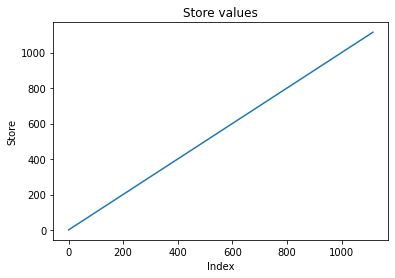

In [30]:
#STORE
ax= sns.lineplot( y=store_df['Store'],x=store_df.index)
ax.set_xlabel('Index')
ax.set_title('Store values')

Text(0.5, 1.0, 'StoreType pie chart')

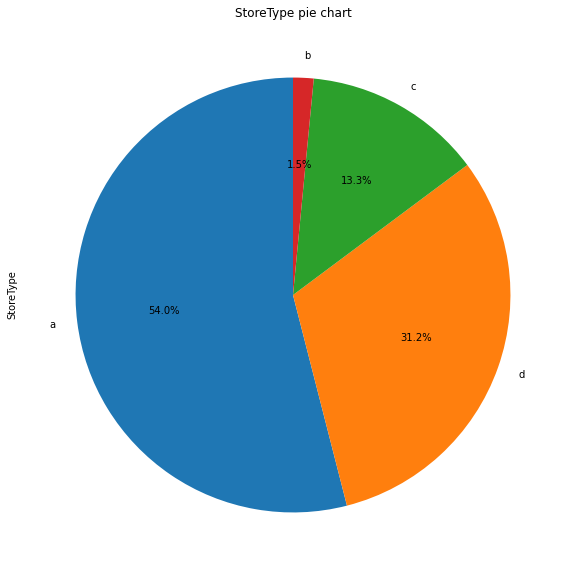

In [31]:
#StoreType pie
store_types = store_df['StoreType'].value_counts().sort_values(ascending=False)
ax= store_types.plot.pie(autopct="%.1f%%",startangle=90, figsize=(10,10))
ax.set_title('StoreType pie chart')

Text(0.5, 1.0, 'CompetitionDistance Histogram')

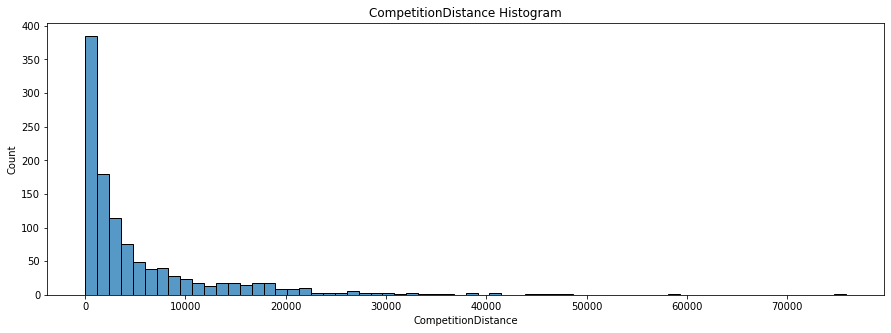

In [32]:
#CompetitionDistance histogram
fig, ax = plt.subplots(figsize=(15,5))
g = sns.histplot(data=store_df, x='CompetitionDistance',ax=ax)
g.set_title('CompetitionDistance Histogram')

Text(0.5, 1.0, 'CompetitionOpenSinceYear Histogram')

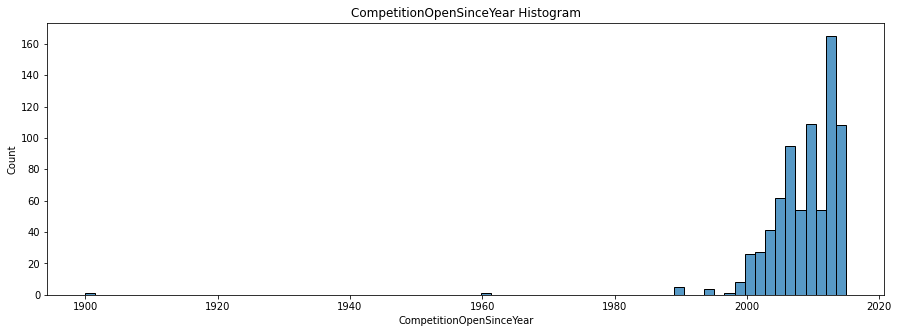

In [33]:
#CompetitionOpenSinceYear histogram
fig, ax = plt.subplots(figsize=(15,5))
g = sns.histplot(data=store_df, x='CompetitionOpenSinceYear',ax=ax)
g.set_title('CompetitionOpenSinceYear Histogram')

Text(0.5, 1.0, 'Promo2 Pie chart')

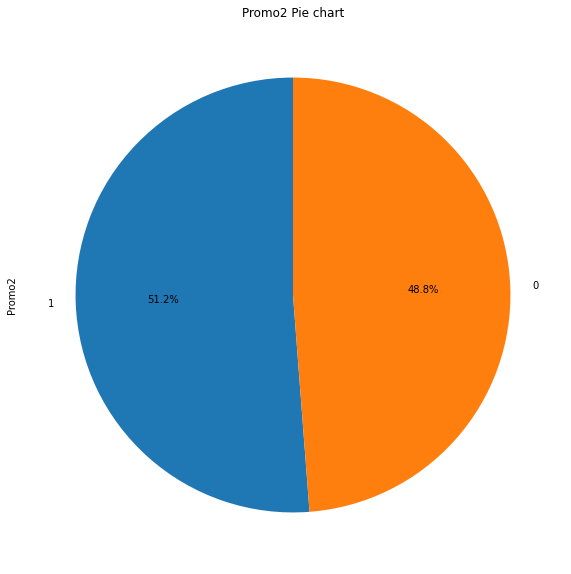

In [34]:
# Promo2 pie
promo2s = store_df['Promo2'].value_counts().sort_values(ascending=False)
ax = promo2s.plot.pie(autopct="%.1f%%",startangle=90, figsize=(10,10))
ax.set_title('Promo2 Pie chart')

Text(0.5, 1.0, 'Promo2SinceYear Histogram')

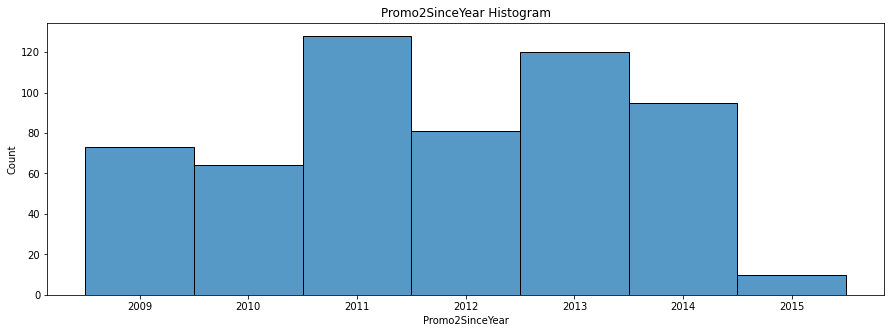

In [35]:
# Promo2SinceYear hist
fig, ax = plt.subplots(figsize=(15,5))
g = sns.histplot(data=store_df, x='Promo2SinceYear',ax=ax,discrete=True)
g.set_title('Promo2SinceYear Histogram')

Text(0.5, 1.0, 'PromoInterval pie chart')

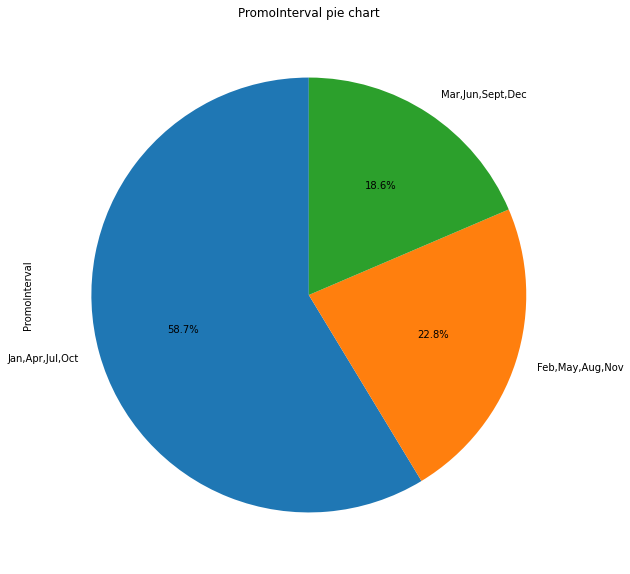

In [36]:
#PromoInterval hist
promo_intervals = store_df['PromoInterval'].value_counts().sort_values(ascending=False)
ax = promo_intervals.plot.pie(autopct="%.1f%%",startangle=90, figsize=(10,10))
ax.set_title('PromoInterval pie chart')

Text(0.5, 1.0, 'DayOfWeek pie chart')

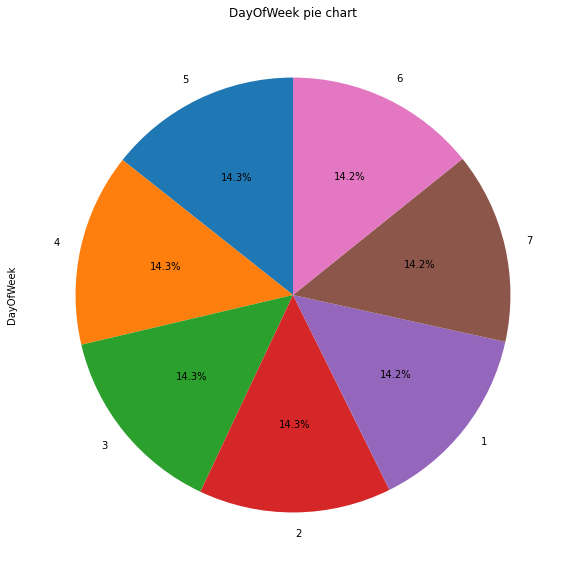

In [38]:
#DayOfWeek pie
day_of_weeks = train_df['DayOfWeek'].value_counts().sort_values(ascending=False)
ax = day_of_weeks.plot.pie(autopct="%.1f%%",startangle=90, figsize=(10,10))
ax.set_title('DayOfWeek pie chart')


Text(0.5, 1.0, 'Sales Histogram')

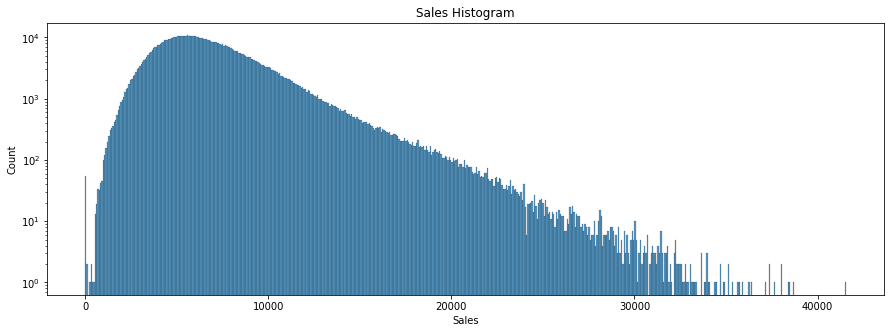

In [39]:
#Sales hist
fig, ax = plt.subplots(figsize=(15,5))
g = sns.histplot(data=merged_df, x='Sales',ax=ax)
ax.set_yscale('log')
ax.set_title('Sales Histogram')

Text(0.5, 1.0, 'Customers Histogram')

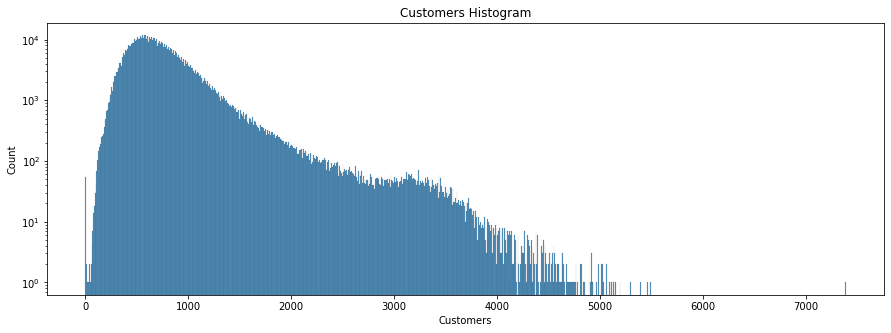

In [40]:
#Customers hist
fig, ax = plt.subplots(figsize=(15,5))
g = sns.histplot(data=merged_df, x='Customers',ax=ax)
ax.set_yscale('log')
ax.set_title('Customers Histogram')

Text(0.5, 1.0, 'Promo pie chart')

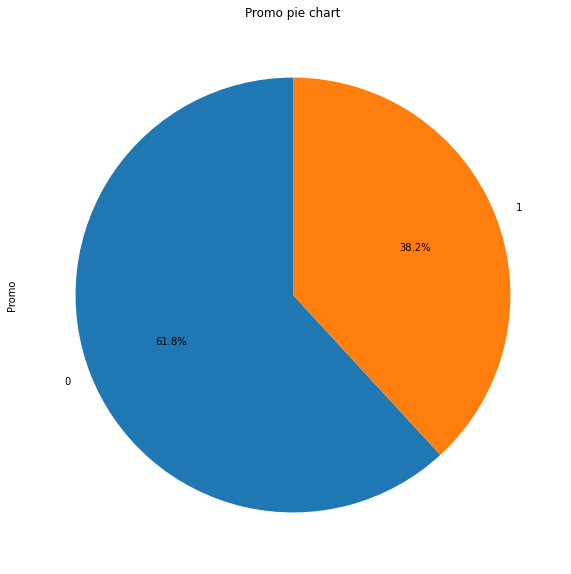

In [41]:
#Promo pie
promos = train_df['Promo'].value_counts().sort_values(ascending=False)
ax = promos.plot.pie(autopct="%.1f%%",startangle=90, figsize=(10,10))
ax.set_title('Promo pie chart')

Text(0.5, 1.0, 'Open pie chart')

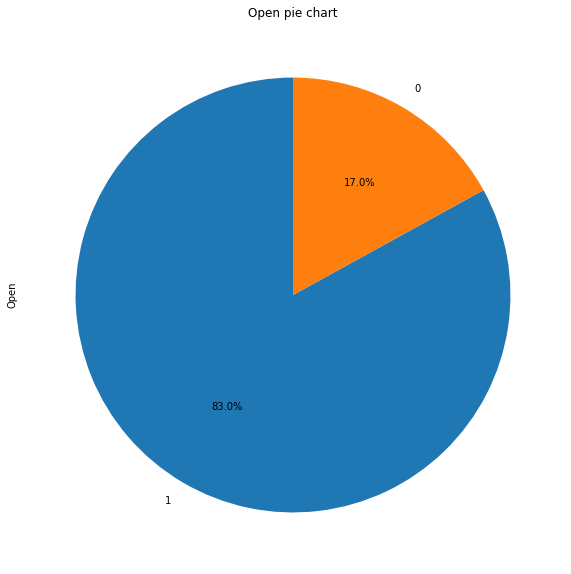

In [42]:
#Open pie
opens = train_df['Open'].value_counts().sort_values(ascending=False)
ax = opens.plot.pie(autopct="%.1f%%",startangle=90, figsize=(10,10))
ax.set_title('Open pie chart')

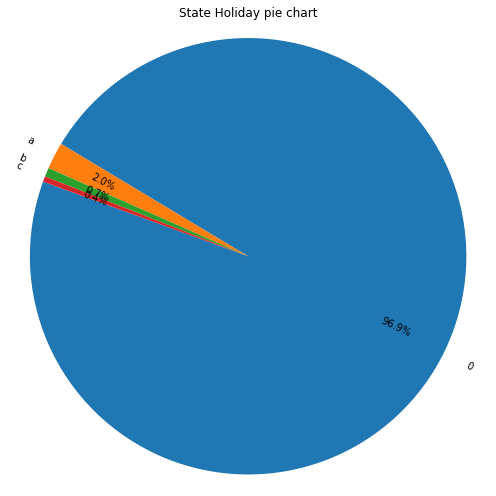

In [43]:
#StateHoliday pie
fig, ax = plt.subplots(figsize=(7,7))
state_holidays = train_df['StateHoliday'].value_counts().sort_values(ascending=False)
_, labels, pct_texts = plt.pie(state_holidays, labels=state_holidays.keys(), autopct="%.1f%%", 
                          startangle=160, rotatelabels=True, pctdistance=0.75)
for label, pct_text in zip(labels, pct_texts):
    pct_text.set_rotation(label.get_rotation())
plt.title('State Holiday pie chart')
plt.axis('equal')
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'SchoolHoliday pie chart')

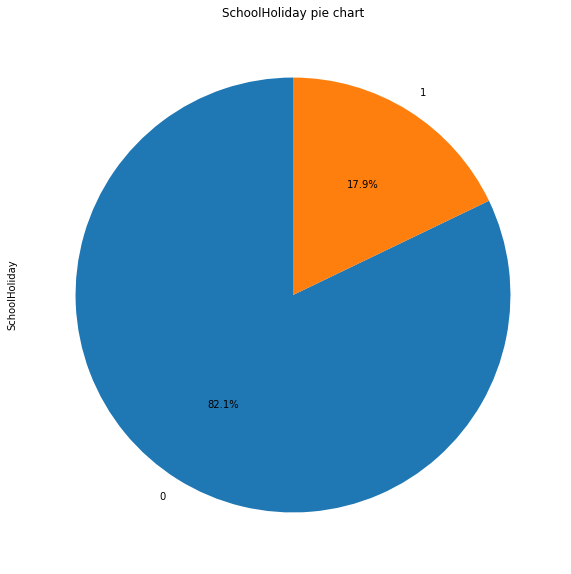

In [44]:
#SchoolHoliday pie
school_holidays=train_df['SchoolHoliday'].value_counts().sort_values(ascending=False)
ax = school_holidays.plot.pie(autopct="%.1f%%", figsize=(10,10), startangle=90)
ax.set_title('SchoolHoliday pie chart')

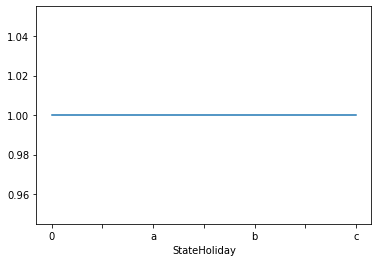

In [45]:
# StateHoliday vs Open
state_holidays = merged_df.groupby('StateHoliday')['Open']
state_holiday_open_rates = state_holidays.sum()/state_holidays.count()
state_holiday_open_rates.plot.line()

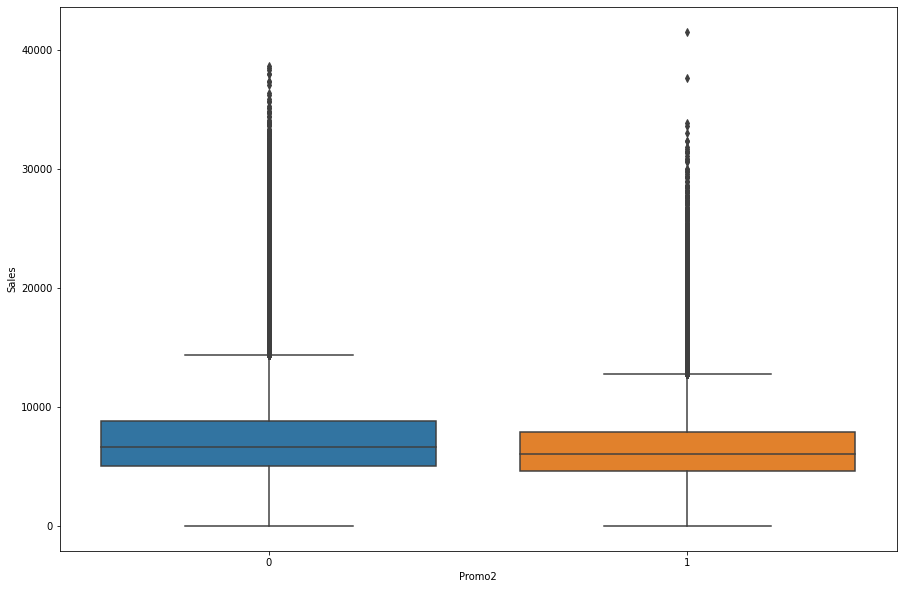

In [46]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(x="Promo2", y="Sales", data=merged_df, ax=ax)

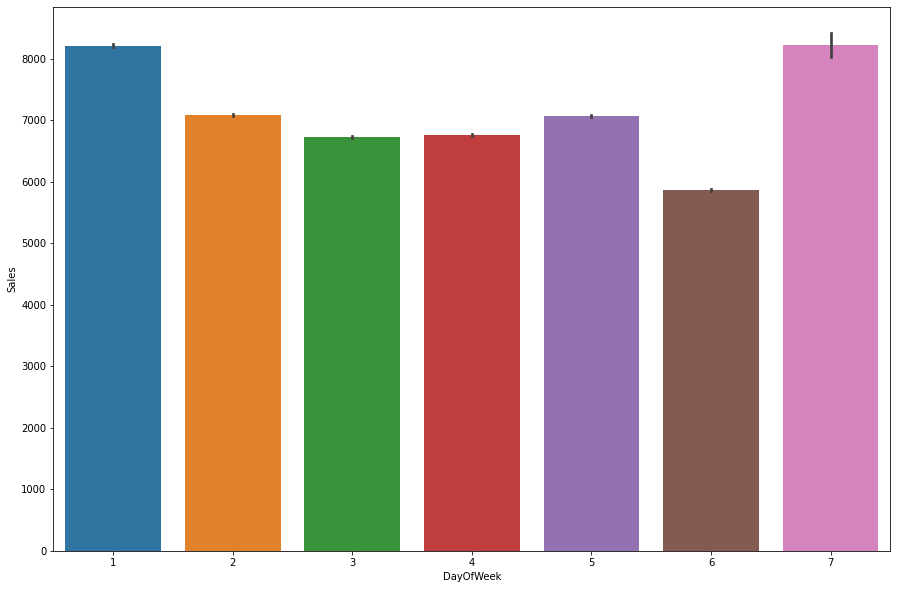

In [47]:
# DayOfWeek vs Sales
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x="DayOfWeek", y="Sales", data=merged_df)

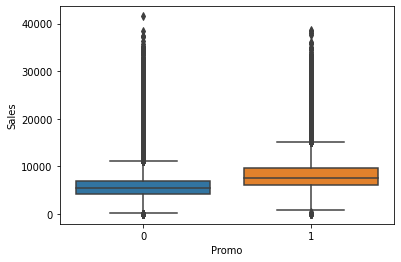

In [48]:
#Promo vs Sales
sns.boxplot(data=merged_df[merged_df['Open']==1],x='Promo',y='Sales')

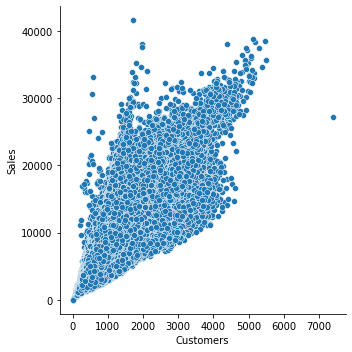

In [49]:
#Customers vs Sales
sns.relplot(data=merged_df, x='Customers',y='Sales')

#Scaling - MinMaxScaler and Encoding - OneHotEncoder

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler().fit(inputs[numeric_cols])

In [ ]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [ ]:
X_train = inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

#Model - 1 - Extreme Gradient Boosting

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb_model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [ ]:
xgb_model.fit(X_train, targets)

[07:11:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=4, n_estimators=20, n_jobs=-1, random_state=42)

In [ ]:
xgb_pred = xgb_model.predict(X_train)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
def rmse(a, b):
    return sqrt(mean_squared_error(a, b))

In [ ]:
print("RMSE:",rmse(xgb_pred, targets))
print("R2 Score:",r2_score(xgb_pred,targets)*100)

RMSE: 2730.558357708397
R2 Score: -372.0084004565648


#Model - 2 - Decision Tree


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, targets, test_size=0.1)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_model = DecisionTreeRegressor(splitter='random', max_depth=16, random_state=21)
dec_tree_model.fit(X_train, Y_train)
dec_tree_pred = dec_tree_model.predict(X_test)

In [ ]:
print("RMSE:",rmse(Y_test, dec_tree_pred))
print("R2 Score:",r2_score(Y_test, dec_tree_pred)*100)

RMSE: 2001.0007859780123
R2 Score: 58.485405394485035


#Model - 3 - Light Gradient Boosting Machine 

In [ ]:
import lightgbm as lgb
base_lgb_model = lgb.LGBMRegressor(n_leaves=50,
                               n_estimators=700, 
                               max_depth=-1,  
                               learning_rate=0.3, #0.1
                               subsample=1,
                               colsample_bytree=0.8,
                               reg_alpha=0.1,
                               reg_lambda=1)

base_lgb_model.fit(X_train, Y_train)

LGBMRegressor(colsample_bytree=0.8, learning_rate=0.3, n_estimators=700,
              n_leaves=50, reg_alpha=0.1, reg_lambda=1, subsample=1)

In [ ]:
base_lgb_pred = base_lgb_model.predict(X_test)
print("RMSE:",rmse(Y_test, base_lgb_pred))
print("R2 Score:",r2_score(Y_test, base_lgb_pred)*100)

RMSE: 797.0179558527987
R2 Score: 93.41368505243958
